<a href="https://colab.research.google.com/github/MalekGroune57/IAE_METZ_DATA_2025_GRP3/blob/main/dossier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRICING OPTIONS**

Dans cette étude, nous allons explorer trois méthodes de pricing d’options, chacune adaptée à un type spécifique d’option :


*   	**Black-Scholes :** Utilisée pour les options européennes, cette formule analytique permet de déterminer le prix d’une option en supposant une volatilité constante et un marché sans arbitrage.

*  **Arbre binomial :** Approprié pour les options américaines, ce modèle discret permet d’évaluer l’option à chaque étape et d’incorporer la possibilité d’un exercice anticipé.

* **Monte Carlo :** Principalement utilisée pour les options exotiques, cette approche repose sur des simulations aléatoires du prix du sous-jacent pour estimer la valeur de l’option.


Les données des options et des sous-jacents sont issues de FactSet, une plateforme de référence en finance de marché. Dans notre cas, nous prendrons des actions comme sous-jacents pour illustrer ces méthodes de pricing.


# **La première étape est d'importer les packages dont on a besoin :**

In [ ]:
import numpy as np #utilisé pour les calculs mathématiques et la manipulation de tableaux numériques
import scipy.stats as si #Permet d’accéder aux fonctions statistiques avancées
import matplotlib.pyplot as plt #Utilisée pour la visualisation des résultats


# **Modèle de Black-Scholes**

Le modèle de Black-Scholes est une formule mathématique utilisée pour estimer le prix des options financières. Il permet de calculer combien devrait coûter une option en fonction de plusieurs facteurs, il est donné par la formule:

**Pour un Call:**


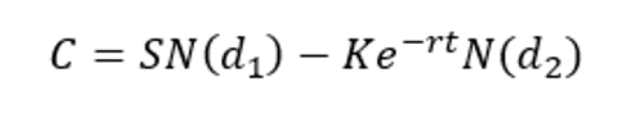

**Pour un Put:**

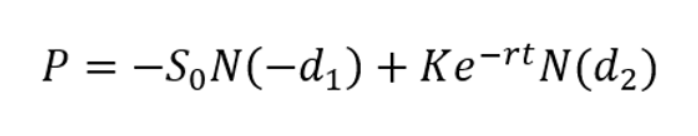

Les paramètres à predre en compte sont :

*    S : Prix actuel de l’actif sous-jacent (par ex. une action).
*   K : Prix d’exercice de l’option (le prix auquel on peut acheter ou vendre l’actif).
*   T : Temps restant avant l’expiration de l’option (en années).
*   r : Taux d’intérêt sans risque (généralement un taux d’obligation d’État).
*   sigma : Volatilité de l’actif sous-jacent (une mesure de la variation des prix).

option_type : Type de l’option, soit "call" (option d’achat), soit "put" (option de vente).


Ce modèle suppose que les prix des actifs suivent une variation aléatoire (un mouvement brownien) et que l’option ne peut pas être exercée avant son expiration (il s’applique aux options européennes).



---


#Paramètres d1 et d2

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T) #np.sqrt(T) = square root pour racine carrée de T

Pour comprendre la formule nous allons la décomposer:


*   **d1** représente la distance entre le prix actuel du sous-jacent (S) et le prix d’exercice (K) donné par "(np.log(S / K)", ajustée en fonction du temps et de la volatilité. Il nous aide à estimer la probabilité ajustée au risque que l’option finisse dans la monnaie (ITM) (c’est-à-dire que l’actif sous-jacent dépasse le prix d’exercice pour un call, ou tombe en dessous pour un put).

*   **d2** est un indicateur clé qui mesure la probabilité, sous la mesure risque-neutre, que l’option soit exercée à l’échéance. Plus **sigma * np.sqrt(T)** est élevé, plus **d2** diminue, ce qui réduit la probabilité que l’option soit dans la monnaie (ITM) à l’échéance. Cela reflète l’incertitude accrue due à une forte volatilité et à un horizon temporel plus long.


---



#Application de la formule

In [ ]:

def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2) # "norm.cdf" signifie l’utilisation de la loi normale centrée réduit N(0,1)
    elif option_type == "put":                                            # donc la probabilité que S > K ou  S < K pour N(d1)
        return K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1) # et la probabilité que l'option soit exercée à échéance pour N(d2)
    else:
        raise ValueError("option_type doit être 'call' ou 'put'")

# Exemple pour l'action Safran SA
S_range = np.linspace(200, 260, 100)
S = 250.50
K = 240    # Prix d'exercice
T = 65/365      # Temps jusqu'à l'expiration (en années)
r = 0.0228   # Taux d'intérêt sans risque, ici l'Euribor 3 mois
sigma = 0.06782  # Volatilité

# Calcul des prix d'option
call_prices = [black_scholes(S_val, K, T, r, sigma, "call") for S_val in S_range]
put_prices = [black_scholes(S_val, K, T, r, sigma, "put") for S_val in S_range]

# Prix théoriques obtenus
call_price_fixed = black_scholes(S, K, T, r, sigma, "call")
put_price_fixed = black_scholes(S, K, T, r, sigma, "put")

print("Black-Scholes Call:", black_scholes(S, K, T, r, sigma, "call"))
print("Black-Scholes Put:", black_scholes(S, K, T, r, sigma, "put"))

Black-Scholes Call: 11.621202083996536
Black-Scholes Put: 0.14871195477678256


#Interprétation Graphique

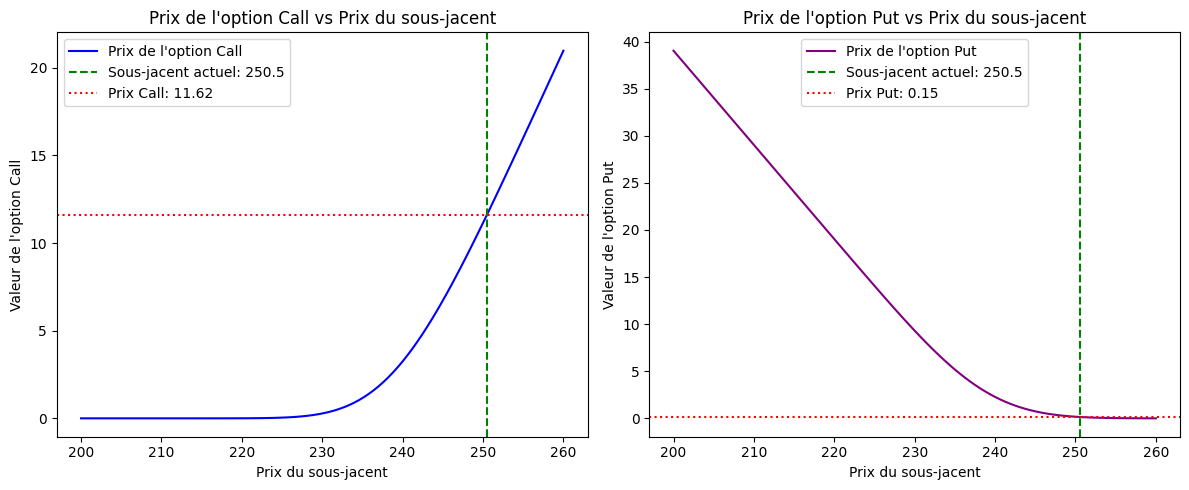

In [ ]:
# Création des graphiques
plt.figure(figsize=(12, 5))

# Graphique Call
plt.subplot(1, 2, 1)
plt.plot(S_range, call_prices, label="Prix de l'option Call", color="blue")
plt.axvline(x=S, color="green", linestyle="--", label=f"Sous-jacent actuel: {S}")
plt.axhline(y=call_price_fixed, color="red", linestyle=":", label=f"Prix Call: {call_price_fixed:.2f}")
plt.xlabel("Prix du sous-jacent")
plt.ylabel("Valeur de l'option Call")
plt.title("Prix de l'option Call vs Prix du sous-jacent")
plt.legend()

# Graphique Put
plt.subplot(1, 2, 2)
plt.plot(S_range, put_prices, label="Prix de l'option Put", color="purple")
plt.axvline(x=S, color="green", linestyle="--", label=f"Sous-jacent actuel: {S}")
plt.axhline(y=put_price_fixed, color="red", linestyle=":", label=f"Prix Put: {put_price_fixed:.2f}")
plt.xlabel("Prix du sous-jacent")
plt.ylabel("Valeur de l'option Put")
plt.title("Prix de l'option Put vs Prix du sous-jacent")
plt.legend()

plt.tight_layout()
plt.show()

# **Binomial Tree**

Le modèle binomial est une approche numérique utilisée pour calculer le prix d’une option en construisant un arbre de prix sur plusieurs périodes. Il repose sur la simulation des mouvements du prix du sous-jacent sur une période discrète et applique la technique du recours arrière (backward induction).

2 nouveaux paramètres à prendre en compte :

*   steps = Nombre de périodes dans l’arbre binomial
*   american = Si True, permet l’exercice anticipé de l’option (cas des options américaines).



L’idée est de diviser la durée de vie de l’option en N étapes (steps), où à chaque étape, le prix de l’actif peut soit augmenter (facteur u) soit diminuer (facteur d) avec une certaine probabilité.

La technique du recours arrière, ou Backward Induction, est une méthode utilisée pour calculer la valeur d’une option en partant de la fin de l’arbre (maturité de l’option) et en remontant jusqu’à la valeur actuelle.

In [ ]:
# Fonction de l'arbre binomial
def binomial_tree(S, K, T, r, sigma, steps=100, option_type="call", american=False):
    dt = T / steps     #On divise la durée de vie de l’option en steps intervalles de temps dt
    u = np.exp(sigma * np.sqrt(dt)) #facteur de hausse
    d = 1 / u          #facteur de baisse donc l'inverse de u
    p = (np.exp(r * dt) - d) / (u - d)

    prices = np.zeros((steps + 1, steps + 1)) #stocke le prix du sous-jacent à step de l’arbre.
    option = np.zeros((steps + 1, steps + 1)) #stocke la valeur de l’option à chaque nœud.

    for i in range(steps + 1):
        prices[i, steps] = S * (u ** (steps - i)) * (d ** i) #Calcule de tous les prix possibles du sous-jacent
        option[i, steps] = max(0, (prices[i, steps] - K) if option_type == "call" else (K - prices[i, steps])) #Payoff de l'option (à maturité)

    for j in range(steps - 1, -1, -1): #Backward induction
        for i in range(j + 1):
            option[i, j] = np.exp(-r * dt) * (p * option[i, j + 1] + (1 - p) * option[i + 1, j + 1])
            if american:
                option[i, j] = max(option[i, j], (prices[i, j] - K) if option_type == "call" else (K - prices[i, j]))
                #aide à identifier les moments où il est optimal d’exercer une option américaine avant son échéance.
    return option[0, 0]

# Exemple avec une option sur l'action Apple
S = 216.98    # Prix actuel de l'actif sous-jacent
K = 210    # Prix d'exercice
T = 9/365      # Temps jusqu'à l'expiration (en années)
r = 0.0428   # Taux d'intérêt sans risque bons du trésor américain à 1 mois
sigma = 0.27807  # Volatilité
steps = 100  # Nombre d'étapes de l'arbre binomial

# Calcul du prix du Call et du Put pour S = 100
call_price_fixed = binomial_tree(S, K, T, r, sigma, steps, "call")
put_price_fixed = binomial_tree(S, K, T, r, sigma, steps, "put")


print("Binomial Tree Call:", binomial_tree(S, K, T, r, sigma, steps=100, option_type="call"))
print("Binomial Tree Put:", binomial_tree(S, K, T, r, sigma, steps=100, option_type="put"))

Binomial Tree Call: 8.37809274271297
Binomial Tree Put: 1.1765877272864365


#Interprétation Graphique

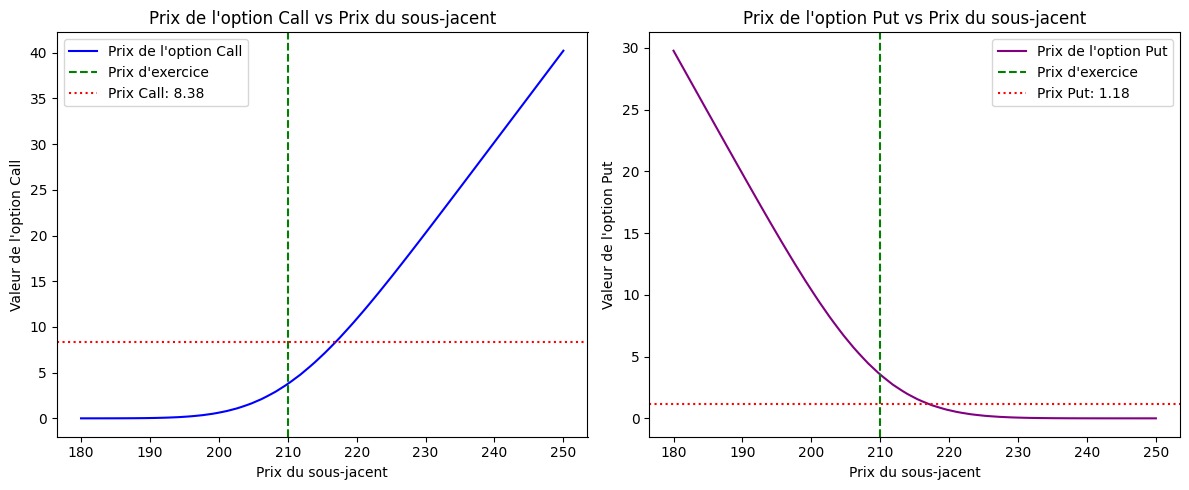

In [ ]:
# Génération des données pour le graphique
S_range = np.linspace(180, 250, 100)
call_prices = [binomial_tree(S_val, K, T, r, sigma, steps, "call") for S_val in S_range]
put_prices = [binomial_tree(S_val, K, T, r, sigma, steps, "put") for S_val in S_range]

# Calcul du prix du Call et du Put pour S = 216.98
call_price_fixed = binomial_tree(S, K, T, r, sigma, steps, "call")
put_price_fixed = binomial_tree(S, K, T, r, sigma, steps, "put")

# Création des graphiques
plt.figure(figsize=(12, 5))

# Graphique Call
plt.subplot(1, 2, 1)
plt.plot(S_range, call_prices, label="Prix de l'option Call", color="blue")
plt.axvline(x=K, color="green", linestyle="--", label="Prix d'exercice")
plt.axhline(y=call_price_fixed, color="red", linestyle=":", label=f"Prix Call: {call_price_fixed:.2f}")  # Ligne rouge en pointillé
plt.xlabel("Prix du sous-jacent")
plt.ylabel("Valeur de l'option Call")
plt.title("Prix de l'option Call vs Prix du sous-jacent")
plt.legend()

# Graphique Put
plt.subplot(1, 2, 2)
plt.plot(S_range, put_prices, label="Prix de l'option Put", color="purple")
plt.axvline(x=K, color="green", linestyle="--", label="Prix d'exercice")
plt.axhline(y=put_price_fixed, color="red", linestyle=":", label=f"Prix Put: {put_price_fixed:.2f}")  # Ligne rouge en pointillé
plt.xlabel("Prix du sous-jacent")
plt.ylabel("Valeur de l'option Put")
plt.title("Prix de l'option Put vs Prix du sous-jacent")
plt.legend()

plt.tight_layout()
plt.show()

# **Monte Carlo**

La méthode de Monte Carlo pour le pricing des options est particulièrement utilisée pour les options exotiques, qui ont des structures de paiement complexes et ne peuvent pas être évaluées avec des modèles classiques comme Black-Scholes.

Elle consiste à simuler de nombreuses évolutions possibles du prix de l’actif sous-jacent jusqu’à l’échéance, en utilisant un modèle mathématique basé sur la volatilité et le taux d’intérêt.  Plus le nombre de simulations est élevé, plus l’estimation est précise.

Ici on prendra 10000 comme nombre de simulations

In [ ]:
def monte_carlo(S, K, T, r, sigma, num_simulations=10000, option_type="call"):
    dt = T
    Z = np.random.standard_normal(num_simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    if option_type == "call":
        payoff = np.maximum(ST - K, 0) # Le Call a de la valeur si ST > K (le prix dépasse le strike)
    else:
        payoff = np.maximum(K - ST, 0) # Le Put a de la valeur si ST < K (le prix dépasse le strike)

    option_price = np.exp(-r * T) * np.mean(payoff) #moyenne de tous les payoffs simulés et on actualise avec le taux sans risque
    return option_price, ST, payoff

# Définition des paramètres
S = 100     # Prix actuel de l'actif sous-jacent
K = 100     # Prix d'exercice
T = 1       # Temps jusqu'à l'expiration (en années)
r = 0.05    # Taux d'intérêt sans risque
sigma = 0.2 # Volatilité
num_simulations = 10000  # Nombre de simulations Monte Carlo

**REMARQUE :** Puisque la méthode de Monte Carlo repose sur un nombre de simulations aléatoires, le résultat variera à chaque exécution du code, mais il convergera toujours vers une valeur proche de l’estimation théorique.

In [ ]:
# Simulation des options Call et Put
call_price, ST_call, payoff_call = monte_carlo(S, K, T, r, sigma, num_simulations, option_type="call")
put_price, ST_put, payoff_put = monte_carlo(S, K, T, r, sigma, num_simulations, option_type="put")

# Affichage des prix estimés
print(f"Monte Carlo Call Price: {call_price:.4f}")
print(f"Monte Carlo Put Price: {put_price:.4f}")

Monte Carlo Call Price: 10.0988
Monte Carlo Put Price: 5.7245


#Interprétation graphique

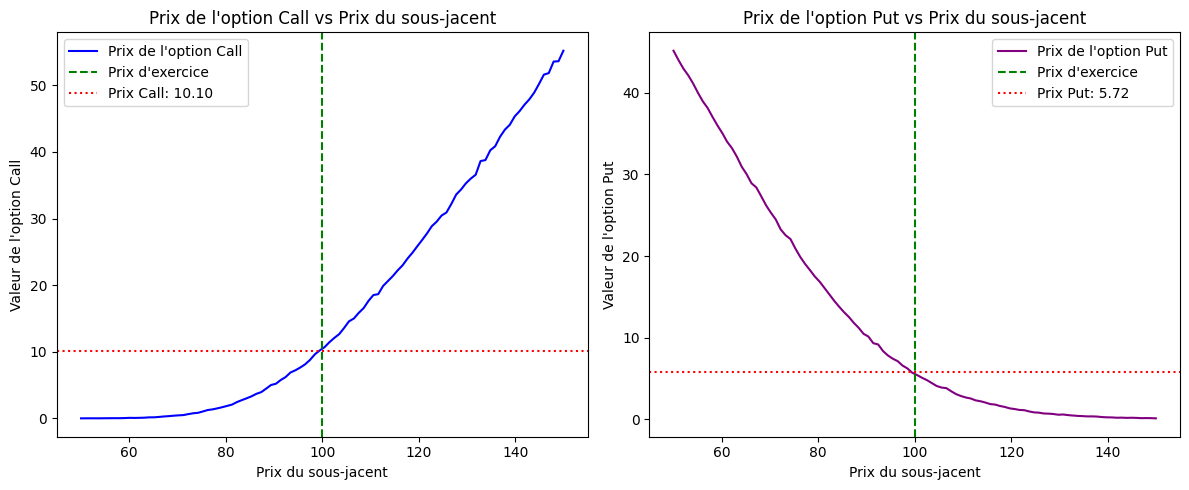

<Figure size 640x480 with 0 Axes>

In [ ]:
# Génération des données pour le graphique
S_range = np.linspace(50, 150, 100)
call_prices = [monte_carlo(S_val, K, T, r, sigma, num_simulations, "call")[0] for S_val in S_range]
put_prices = [monte_carlo(S_val, K, T, r, sigma, num_simulations, "put")[0] for S_val in S_range]

# Calcul du prix du Call et du Put pour S = 100
# Utilisation des valeurs déjà calculées
call_price_fixed = call_price  # Utilisation de la valeur obtenue dans le print()
put_price_fixed = put_price  # Utilisation de la valeur obtenue dans le print()

# Création des graphiques
plt.figure(figsize=(12, 5))

# Graphique Call
plt.subplot(1, 2, 1)
plt.plot(S_range, call_prices, label="Prix de l'option Call", color="blue")
plt.axvline(x=K, color="green", linestyle="--", label="Prix d'exercice")
plt.axhline(y=call_price_fixed, color="red", linestyle=":", label=f"Prix Call: {call_price_fixed:.2f}")  # Ligne rouge en pointillé
plt.xlabel("Prix du sous-jacent")
plt.ylabel("Valeur de l'option Call")
plt.title("Prix de l'option Call vs Prix du sous-jacent")
plt.legend()

# Graphique Put
plt.subplot(1, 2, 2)
plt.plot(S_range, put_prices, label="Prix de l'option Put", color="purple")
plt.axvline(x=K, color="green", linestyle="--", label="Prix d'exercice")
plt.axhline(y=put_price_fixed, color="red", linestyle=":", label=f"Prix Put: {put_price_fixed:.2f}")  # Ligne rouge en pointillé
plt.xlabel("Prix du sous-jacent")
plt.ylabel("Valeur de l'option Put")
plt.title("Prix de l'option Put vs Prix du sous-jacent")
plt.legend()

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


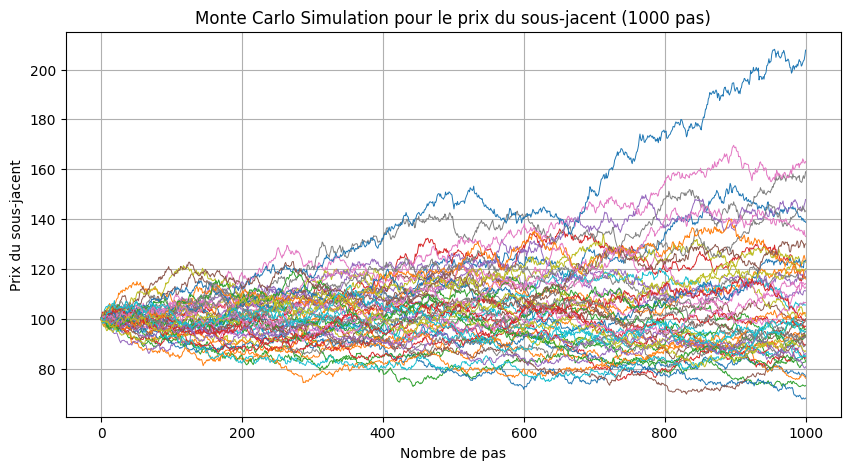

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
S0 = 100     # Prix initial de l'actif sous-jacent
K = 100      # Prix d'exercice
T = 1        # Temps jusqu'à expiration (en années)
r = 0.05     # Taux d'intérêt sans risque
sigma = 0.2  # Volatilité
num_simulations = 1000  # Nombre de simulations Monte Carlo
n_steps = 1000  # Nombre de pas

# Discrétisation du temps
dt = T / n_steps

# Simulation de 1000 trajectoires de prix
S = np.zeros((num_simulations, n_steps + 1))
S[:, 0] = S0  # Le premier prix est toujours S0

for t in range(1, n_steps + 1):
    Z = np.random.standard_normal(num_simulations)  # Bruit gaussien
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Tracer les trajectoires
plt.figure(figsize=(10, 5))
for i in range(50):  # On affiche 50 trajectoires pour éviter trop de courbes
    plt.plot(S[i, :], linewidth=0.7)

plt.title("Monte Carlo Simulation pour le prix du sous-jacent (1000 pas)")
plt.xlabel("Nombre de pas")
plt.ylabel("Prix du sous-jacent")
plt.grid(True)  # Activation du quadrillage
plt.show()

Ce graphique représente 50 trajectoires simulées du prix d’un actif sous-jacent sur un an, générées par la méthode de Monte Carlo avec 1000 pas de temps. On observe une dispersion progressive des trajectoires due à la volatilité, certaines réalisations montrant une forte appréciation tandis que d’autres baissent. Cette simulation illustre l’incertitude des marchés financiers et permet d’estimer la distribution future du prix d’un actif.